In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller

from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [225]:
 df = pd.read_excel('Sample Commodities_Vegetables_Hyderabad_Market.xls',
                    sheet_name="ClusterBeans",parse_dates =["Date"], index_col ='Date')
df.head(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2017-01-01,ClusterBeans,13,2000,2000.0000,2000.0000,Private Traders
2017-01-02,ClusterBeans,16,2000,2000.0000,2000.0000,Private Traders


In [226]:
df.tail(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2019-12-30,ClusterBeans,10,3000,2000.0000,2500.0000,Private Traders
2019-12-31,ClusterBeans,10,3000,2000.0000,2500.0000,Private Traders


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2017-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variety Name    847 non-null    object 
 1   Arrivals(Qtls)  847 non-null    int64  
 2   Maximum         847 non-null    int64  
 3   Minimum         846 non-null    float64
 4   Model           846 non-null    float64
 5   Purchase by     847 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ KB


In [228]:
df.isnull().sum()

Variety Name      0
Arrivals(Qtls)    0
Maximum           0
Minimum           1
Model             1
Purchase by       0
dtype: int64

In [232]:
df.describe()

,Arrivals(Qtls),Maximum,Minimum,Model
count,847.0000,847.0000,846.0000,846.0000
mean,12.6021,2561.0425,2161.8203,2368.0851
std,6.2237,1089.4991,580.8245,848.8930
min,1.0000,3.0000,100.0000,250.0000
25%,8.0000,2000.0000,1925.0000,2000.0000
50%,12.0000,2500.0000,2000.0000,2250.0000
75%,16.0000,3000.0000,2500.0000,2500.0000
max,54.0000,30000.0000,6250.0000,22000.0000


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

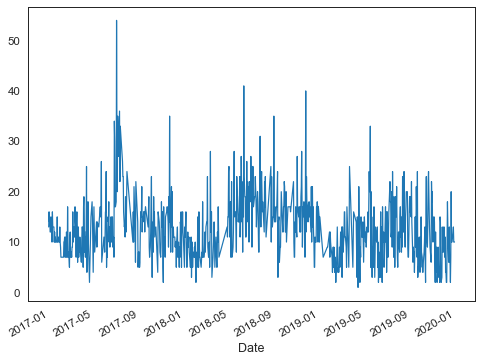

In [234]:
df['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [235]:
df = df[~df.index.duplicated()]

In [236]:
dt = pd.date_range(start ='25-04-2017', end ='31-12-2019', freq ='D' )
dt

DatetimeIndex(['2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30', '2017-05-01', '2017-05-02',
               '2017-05-03', '2017-05-04',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=981, freq='D')

In [237]:
df1 = pd.DataFrame(columns=['Arrivals(Qtls)'],data=df, index = dt)
df1.head(10)

,Arrivals(Qtls)
2017-04-25,15.0000
2017-04-26,nan
2017-04-27,nan
2017-04-28,18.0000
2017-04-29,15.0000
2017-04-30,nan
2017-05-01,4.0000
2017-05-02,11.0000
2017-05-03,17.0000
2017-05-04,nan


In [238]:
df1.isnull().sum()

Arrivals(Qtls)    240
dtype: int64

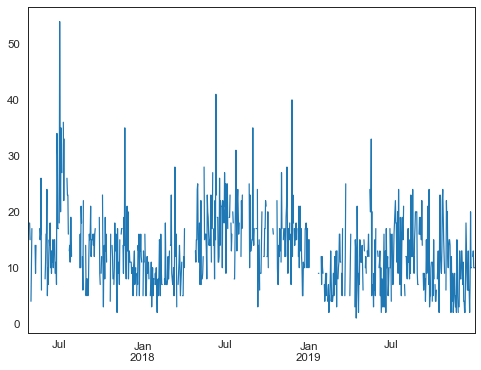

In [239]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [ ]:
#df1 = df1.fillna(df1.rolling(22,min_periods=1).mean())

In [240]:
df1 = df1.fillna(df1.rolling(22,min_periods=1).mean())

In [241]:
df1.isnull().sum()

Arrivals(Qtls)    0
dtype: int64

#### the null values are filled after 9 datapoints

In [242]:
df1.value_counts()

Arrivals(Qtls)
12.0000           56
9.0000            51
16.0000           50
10.0000           50
7.0000            50
                  ..
15.0526            1
14.8824            1
14.8000            1
14.7143            1
1.0000             1
Length: 200, dtype: int64

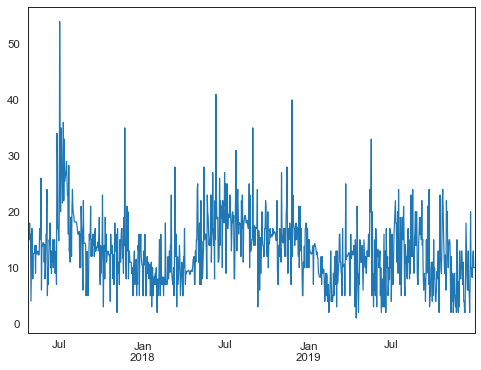

In [198]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [243]:
q1= df1.quantile(0.25)
q3 = df1.quantile(0.75)
qmax= df1.quantile(0.90)
q1,q3,qmax

(Arrivals(Qtls)   9.0000
 Name: 0.25, dtype: float64,
 Arrivals(Qtls)   16.0000
 Name: 0.75, dtype: float64,
 Arrivals(Qtls)   20.0000
 Name: 0.9, dtype: float64)

In [49]:
#for i in range(len(df)):
  #  if df1['Arrivals(Qtls)'][i] >= 18000:
   #     print(df1['Arrivals(Qtls)'][i])
  #      df1['Arrivals(Qtls)'][i] = qmax

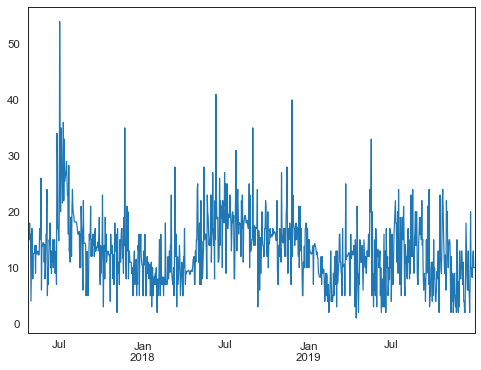

In [244]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

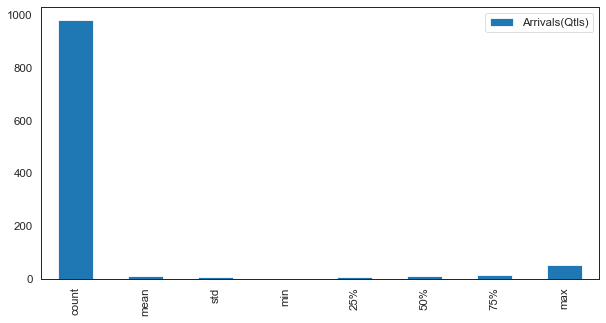

In [161]:
df1.describe().plot.bar(figsize=(10,5))
plt.show()

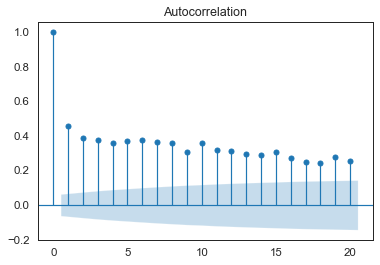

In [245]:
plot_acf(df1, lags =20)
plt.show()

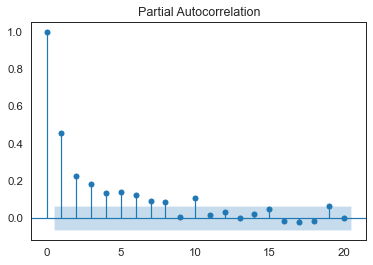

In [246]:
plot_pacf(df1,lags =20)
plt.show()

Statistical Normality Test
There are several statistical tests that we can use to quantify whether our data looks as though it was drawn from a Gaussian distribution. ## And we will use D’Agostino’s K^2 Test.

In the SciPy implementation of the test, we will interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.

In [247]:
stat, p = stats.normaltest(df['Arrivals(Qtls)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=204.528, p=0.000
Data does not look Gaussian (reject H0)


#### The plot for 200 datapoints ...~ 7 months

<Figure size 576x288 with 0 Axes>

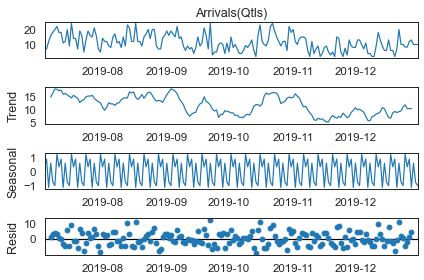

In [249]:
plt.figure(figsize=(8,4))
results = seasonal_decompose(df1['Arrivals(Qtls)'].iloc[800:1000])
results.plot()
plt.show();

#### DICKEY FULLER TEST for STATIONARITY

In [250]:
observations= df1.values
test_result = adfuller(observations)

In [251]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -4.206833
p-value: 0.000642
Critical Values:
	1%: -3.43710
	5%: -2.86452
	10%: -2.56836


#### LSTM model 

In [252]:
dataset = df1['Arrivals(Qtls)'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [253]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [254]:
# reshape into X=t and Y=t+1
look_back = 15
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

#### MODEL ARCHITECTURE

In [255]:
X_train.shape

(768, 15)

In [256]:
Y_train.shape

(768,)

In [257]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [258]:
X_train.shape

(768, 1, 15)

In [259]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               46400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 46,501
Trainable params: 46,501
Non-trainable params: 0
_________________________________________________________________


In [260]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [261]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Train on 768 samples, validate on 181 samples
Epoch 1/100
768/768 [==============================] - 1s 949us/step - loss: 0.0116 - val_loss: 0.0098
Epoch 2/100
768/768 [==============================] - 0s 435us/step - loss: 0.0095 - val_loss: 0.0096
Epoch 3/100
768/768 [==============================] - 0s 382us/step - loss: 0.0093 - val_loss: 0.0095
Epoch 4/100
768/768 [==============================] - 0s 378us/step - loss: 0.0095 - val_loss: 0.0095
Epoch 5/100
768/768 [==============================] - 0s 395us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 6/100
768/768 [==============================] - 0s 316us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 7/100
768/768 [==============================] - 0s 392us/step - loss: 0.0094 - val_loss: 0.0095
Epoch 8/100
768/768 [==============================] - 0s 398us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 9/100
768/768 [==============================] - 0s 396us/step - loss: 0.0098 - val_loss: 0.0095
Epoch 10/100
768/768 [=====

In [262]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 3.5746872988091845
Train Root Mean Squared Error: 5.15875454932089
Test Mean Absolute Error: 4.087202238002529
Test Root Mean Squared Error: 5.1486162153452435


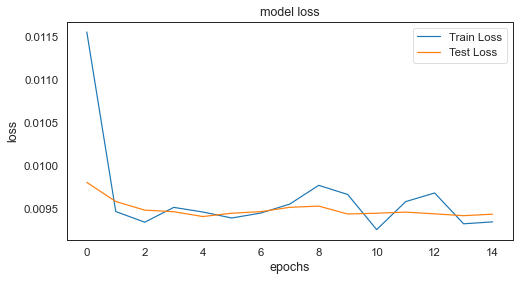

In [263]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

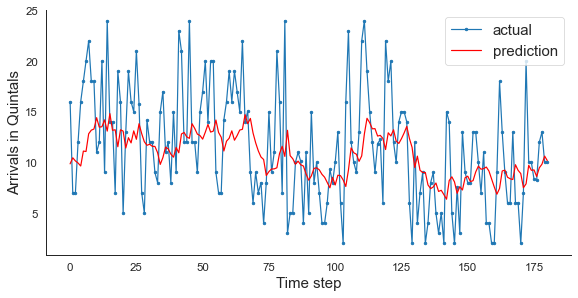

In [264]:
aa=[x for x in range(181)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Arrivals in Quintals', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Kurtosis of normal distribution: 3.482553336145438
Skewness of normal distribution: 1.061247486163233


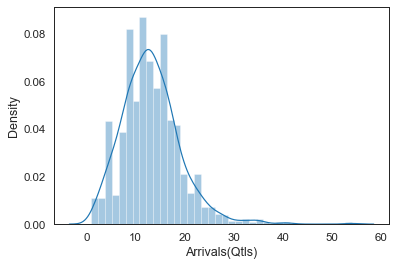

In [265]:
# print(df['Arrivals(Qtls)'].describe())
sns.distplot(df1['Arrivals(Qtls)']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df1['Arrivals(Qtls)'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df1['Arrivals(Qtls)'])))

,count,mean,std,min,25%,50%,75%,max
Arrivals(Qtls),981.0000,13.1259,5.9503,1.0000,9.0000,12.6429,16.0000,54.0000


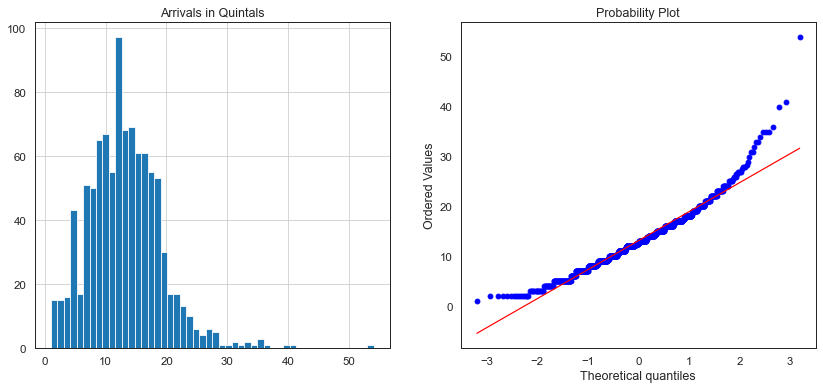

In [266]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df1['Arrivals(Qtls)'].hist(bins=50)
plt.title('Arrivals in Quintals')

plt.subplot(1,2,2)
stats.probplot(df1['Arrivals(Qtls)'], plot=plt);
df1.describe().T

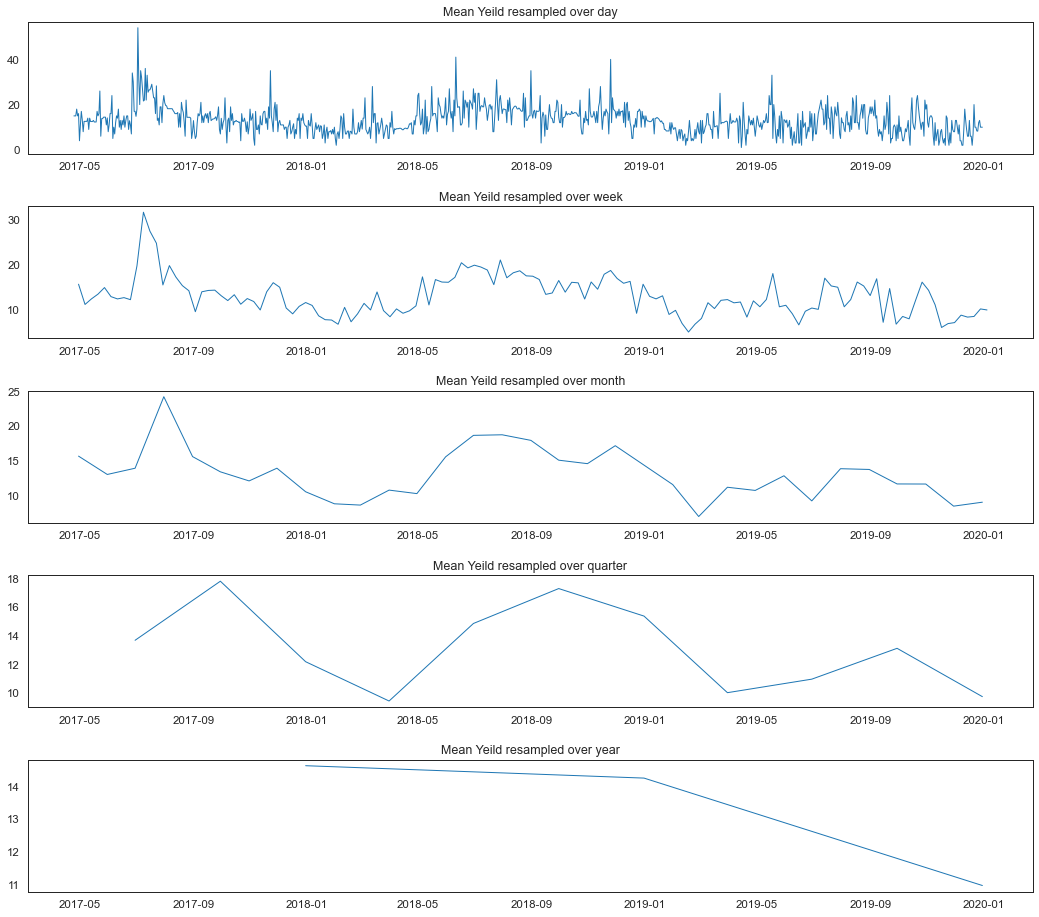

In [267]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Arrivals(Qtls)'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Yeild resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Arrivals(Qtls)'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Yeild resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Arrivals(Qtls)'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Yeild resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Arrivals(Qtls)'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Yeild resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['Arrivals(Qtls)'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Yeild resampled over year')
ax5.tick_params(axis='both', which='major');